## 1


In [229]:
import copy

from lab4.digraph_generator import generate_digraph_by_probability

graph = generate_digraph_by_probability(7, 0.3)

graph

{0: [3, 5],
 1: [3, 4, 6],
 2: [0, 1, 3],
 3: [0, 2],
 4: [1, 2, 6],
 5: [4],
 6: [5]}

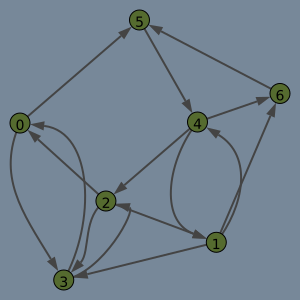

In [230]:
import igraph

# Dictionary representation of graph with weights
g = igraph.Graph(directed=True)

# add vertices to the graph
g.add_vertices(list(range(len(graph))))

# add edges to the graph
for vertex, neighbors in graph.items():
    for neighbor in neighbors:
        g.add_edge(vertex, neighbor)

igraph.plot(g, vertex_label=graph.keys(), vertex_color='Dark Olive Green', edge_width=2, background='Light Slate Gray',
            bbox=(300, 300))

# [5, 4, 6, 2, 0, 1, 3]

## 2


In [231]:
from lab4.digraph_components import find_connected_components

connected_components = find_connected_components(graph)
print(connected_components)

[[6, 5, 4, 1, 3, 2, 0]]


## 3


In [232]:
from lab4.digraph_bellman_ford import bellman_ford, assign_edge_weight

g, w = assign_edge_weight(graph, -5, 20)

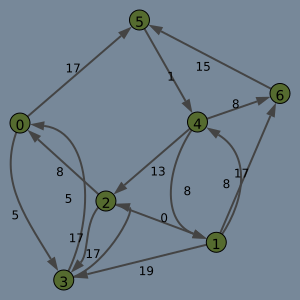

In [233]:
gr = igraph.Graph(directed=True)
gr.add_vertices(list(g.keys()))

for u, n in g.items():
    for v in n:
        if w[u][v] is not None:
            gr.add_edge(u, v, weight=w[u][v])

igraph.plot(gr, vertex_label=g.keys(), vertex_color='Dark Olive Green', edge_width=2, background='Light Slate Gray',
            bbox=(300, 300), edge_label=gr.es['weight'])


In [234]:
start = 6
ds, ps = bellman_ford(g, w, start)

ds, ps

({0: 37, 1: 24, 2: 29, 3: 42, 4: 16, 5: 15, 6: 0},
 {0: 2, 1: 4, 2: 4, 3: 0, 4: 5, 5: 6, 6: None})

In [235]:
from lab4.digraph_bellman_ford import print_shortest_path

print_shortest_path(g, start, ds, ps)

Shortest path from 6 to 0 (37): [6, 5, 4, 2, 0]
Shortest path from 6 to 1 (24): [6, 5, 4, 1]
Shortest path from 6 to 2 (29): [6, 5, 4, 2]
Shortest path from 6 to 3 (42): [6, 5, 4, 2, 0, 3]
Shortest path from 6 to 4 (16): [6, 5, 4]
Shortest path from 6 to 5 (15): [6, 5]
Shortest path from 6 to 6 (0): [6]


## 4


In [236]:
from lab4.digraph_johnson import johnson
import sys
import numpy as np

d = johnson(graph, w)
d = np.array(d)

np.savetxt(sys.stdout, d, fmt='%5s' * d.shape[1])


    0   22   22    5   18   17   26
   24    0   21   19    8   31   16
    8    0    0   13    8   25   16
    5   17   17    0   23   22   31
   21    8   13   26    0   23    8
   22    9   14   27    1    0    9
   37   24   29   42   16   15    0
